In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [10]:
dataset=pd.read_csv("ad.csv",index_col="Unnamed: 0")
#dataset=pd.read_csv("ad.csv")

In [11]:
dataset

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [14]:
x=dataset.iloc[:,:3]

In [15]:
x

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [16]:
y=dataset.iloc[:,3]

In [17]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [20]:
import statsmodels.api as sm

In [21]:
x1=sm.add_constant(x)

In [23]:
model=sm.OLS(y,x1).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        03:19:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#LinearRelationship
#1.ScatterPlot

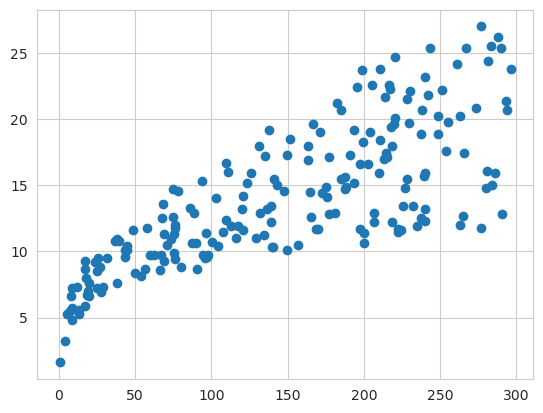

In [28]:
plt.scatter(dataset['TV'],dataset['Sales'])
plt.show()
#notlinear

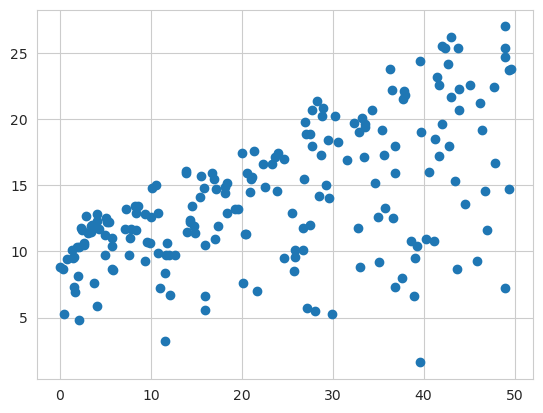

In [29]:
plt.scatter(dataset['Radio'],dataset['Sales'])
plt.show()

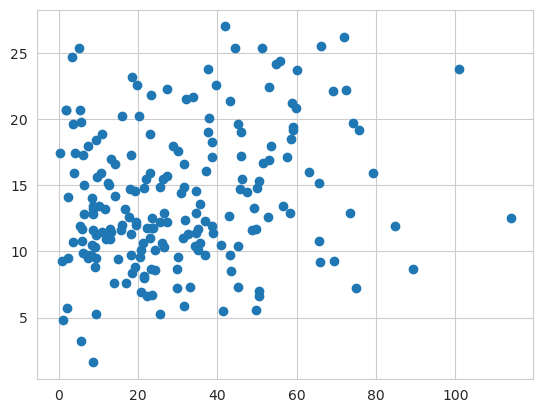

In [30]:
plt.scatter(dataset['Newspaper'],dataset['Sales'])
plt.show()
#Linear

In [32]:
#2.Rainbow
sm.stats.diagnostic.linear_rainbow(res=model)

(0.8896886584728816, 0.7185004116483392)

<AxesSubplot:>

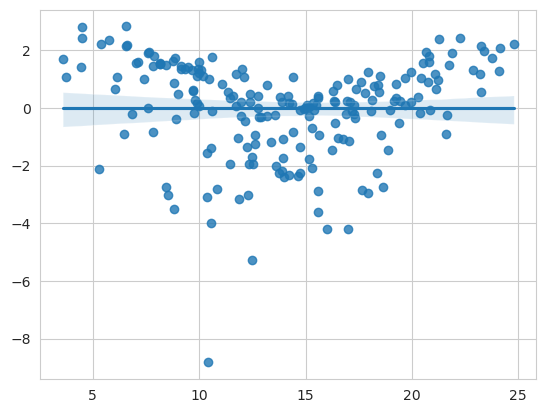

In [33]:
sns.regplot(x=model.predict(x1),y=model.resid)

In [34]:
# Autocorrelation
# DW test score ==> 2.08
# means we have little Autocorelation

In [35]:
# Multivatriate Normality
#1.distplot

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


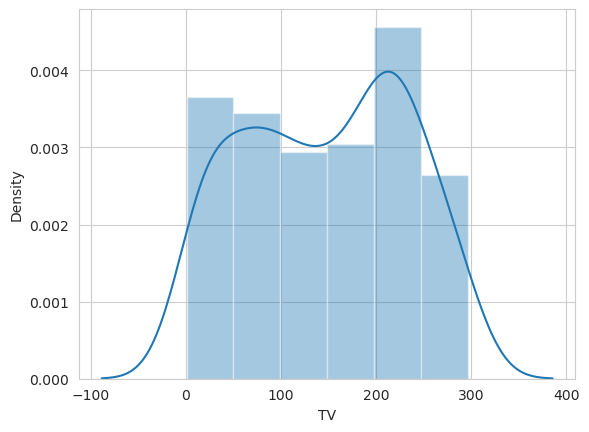

In [42]:
sns.distplot(dataset['TV'])
plt.show()
#normal

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


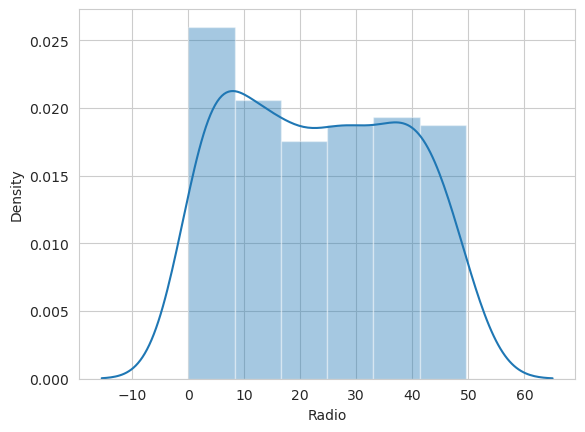

In [45]:
sns.distplot(dataset['Radio'])
plt.show()
#normal

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


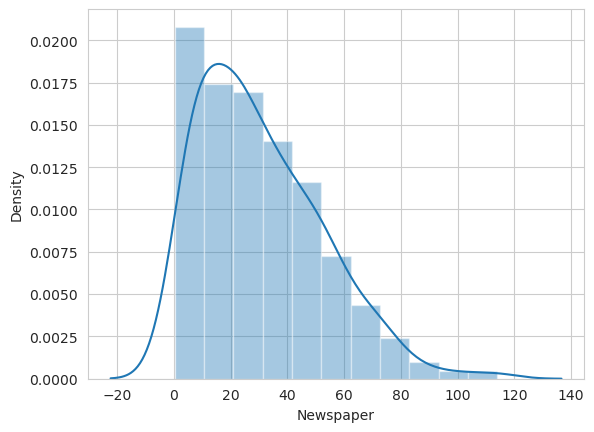

In [47]:
sns.distplot(dataset['Newspaper'])
plt.show()
#exponential

In [ ]:
sns.distplot(dataset['Sales'])
plt.show()

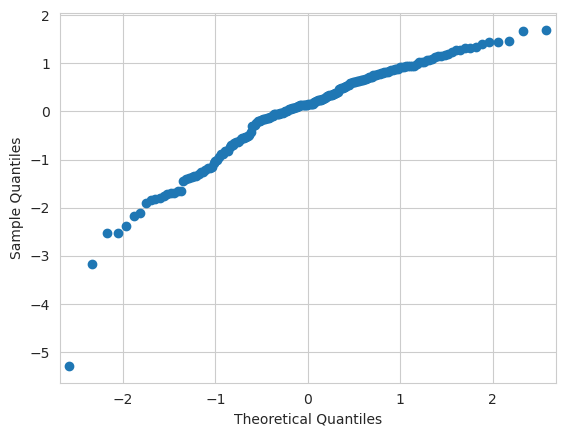

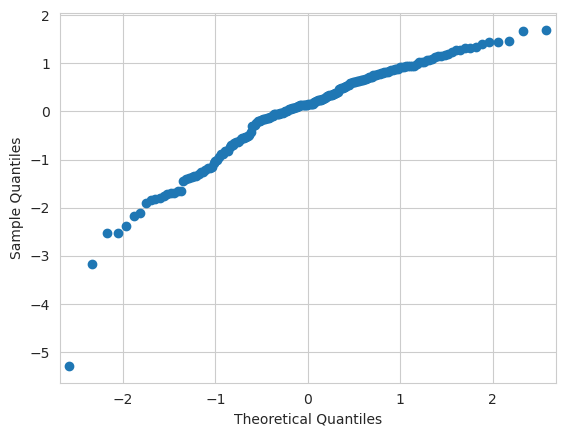

In [49]:
#2.q-q plot
sm.qqplot(model.resid,fit=True)

In [50]:
# Homosecadastcity
import statsmodels.stats.api as sms

In [51]:
sms.het_goldfeldquandt(model.resid,model.model.exog)

(1.351683204009075, 0.07082060666290749, 'increasing')

In [52]:
# Multicorrelation

In [53]:
x

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [56]:
x1.corr()
#NocorrelationCoef

,const,TV,Radio,Newspaper
const,NaN,NaN,NaN,NaN
TV,NaN,1.000000,0.054809,0.056648
Radio,NaN,0.054809,1.000000,0.354104
Newspaper,NaN,0.056648,0.354104,1.000000


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = [variance_inflation_factor(x1.values,i) for i in range(0,3)]

In [59]:
vif

[6.848899953334954, 1.0046107849396502, 1.1449519171055353]

In [60]:
#example2
dataset2=pd.read_csv("multisat.csv")

In [61]:
dataset2

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [66]:
a=dataset2[['SAT','Rand 1,2,3']]

In [67]:
b=dataset2['GPA']

In [68]:
a1=sm.add_constant(a)

In [70]:
model2=sm.OLS(b,a1).fit()

In [71]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           6.58e-10
Time:                        04:17:08   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

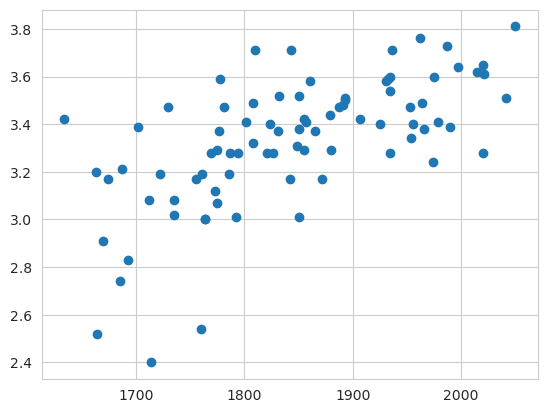

In [73]:
#LinearRelationship
#1.ScatterPlot

plt.scatter(dataset2['SAT'],dataset2['GPA'])
plt.show()

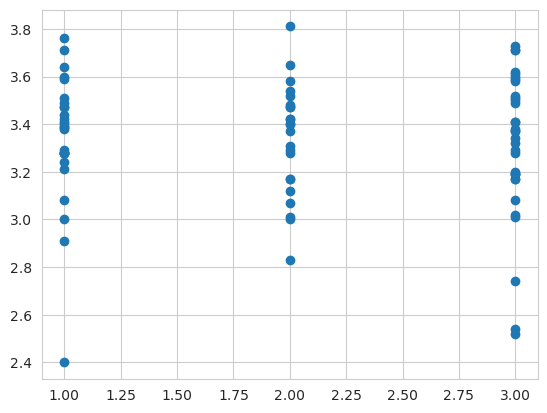

In [74]:
plt.scatter(dataset2['Rand 1,2,3'],dataset2['GPA'])
plt.show()

In [76]:
#Rainbow
sm.stats.diagnostic.linear_rainbow(res=model2)

(10.956867171121575, 5.375501879263846e-12)

In [77]:
#AutoCorrelation
#Durbin-watson=0.948
#+ve autocorrlation

In [78]:
#Multivariate Normality
#distplot

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


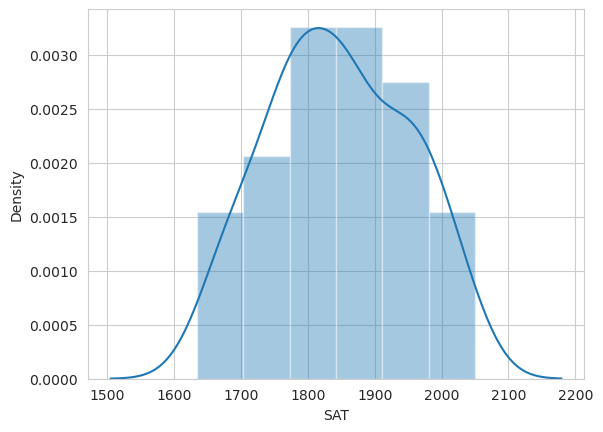

In [81]:
sns.distplot(dataset2['SAT'])
plt.show()

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


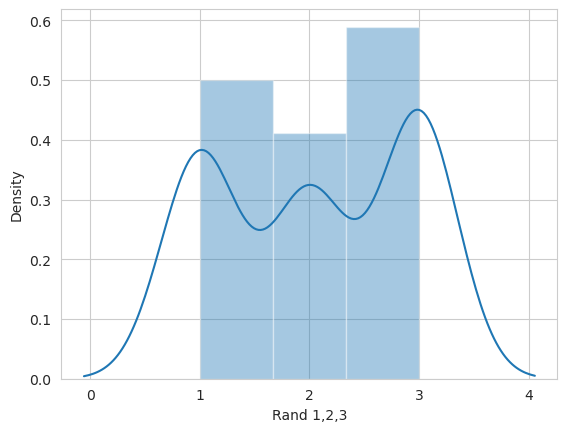

In [82]:
sns.distplot(dataset2['Rand 1,2,3'])
plt.show()

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


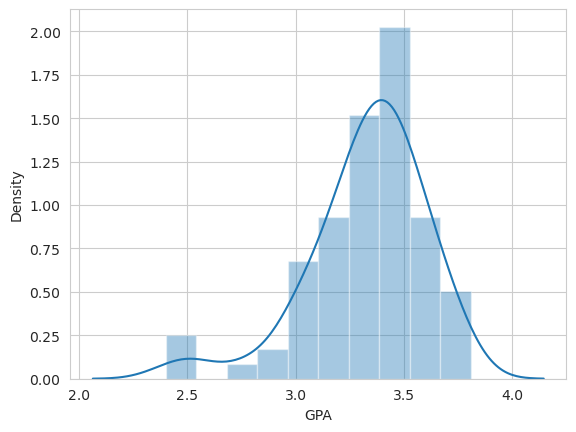

In [83]:
sns.distplot(dataset2['GPA'])
plt.show()

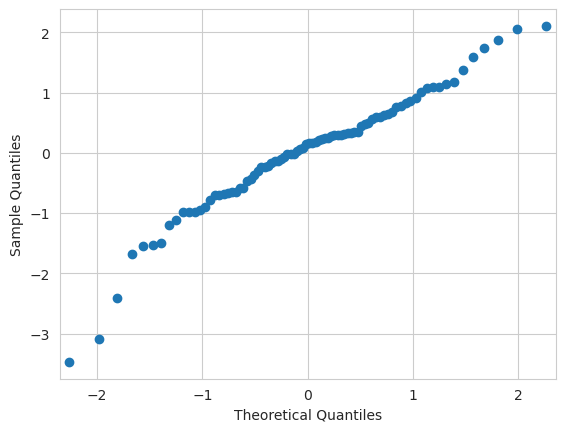

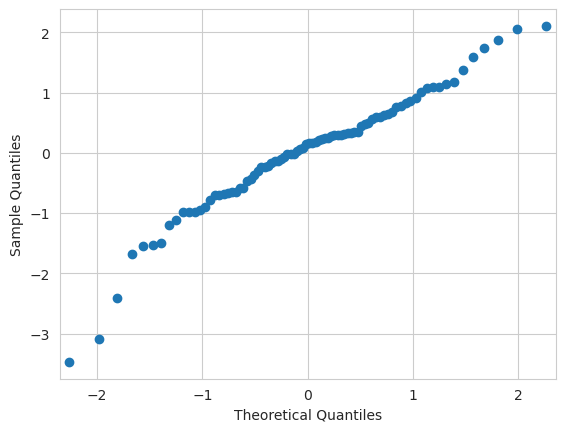

In [84]:
#q-qplot
sm.qqplot(model2.resid,fit=True)
#Linear

In [85]:
#HomoSecadasiticy
#GoldfeldTest

In [86]:
sms.het_goldfeldquandt(model2.resid,model2.model.exog)

(0.29065688785210586, 0.9999011025604895, 'increasing')

In [87]:
#No or little Multicolinearity
#1.Correlation coefficient

In [94]:
a1.corr()

,const,SAT,"Rand 1,2,3"
const,NaN,NaN,NaN
SAT,NaN,1.000000,-0.031722
"Rand 1,2,3",NaN,-0.031722,1.000000


In [89]:
#2.VIF

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif2=[variance_inflation_factor(a1.values,i) for i in range(0,3)]

In [98]:
vif

[6.848899953334954, 1.0046107849396502, 1.1449519171055353]